<a href="https://colab.research.google.com/github/jcterrero02/CoderHouse/blob/main/Fundamentos%20para%20la%20Ciencia%20de%20Datos/Credit_Card_Elegibility_Julio_Terrero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importamos las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Url del dataset hosteado en Github, con informacion sobre aprobaciones de tarjetas de credito
url = 'https://raw.githubusercontent.com/jcterrero02/CoderHouse/main/Fundamentos%20para%20la%20Ciencia%20de%20Datos/data/credit_card_elegibilty.csv'

dataset = pd.read_csv(url, delimiter=',')

Variable	Description
*  **ID**	An identifier for each individual (customer).
* **Gender**	The gender of the individual.
* **Own_car**	A binary feature indicating whether the individual owns a car.
* **Own_property**	A binary feature indicating whether the individual owns a property.
* **Work_phone**	A binary feature indicating whether the individual has a work phone.
* **Phone**	A binary feature indicating whether the individual has a phone.
* **Email**	A binary feature indicating whether the individual has provided an email address.
* **Unemployed**	A binary feature indicating whether the individual is unemployed.
* **Num_children**	The number of children the individual has.
* **Num_family**	The total number of family members.
* **Account_length**	The length of the individual's account with a bank or financial institution.
* **Total_income**	The total income of the individual.
* **Age**	The age of the individual.
* **Years_employed**	The number of years the individual has been employed.
* **Income_type**	The type of income (e.g., employed, self-employed, etc.).
* **Education_type**	The education level of the individual.
* **Family_status**	The family status of the individual.
* **Housing_type**	The type of housing the individual lives in.
* **Occupation_type**	The type of occupation the individual is engaged in.
* **Target**	The target variable for the classification task, indicating whether the individual is eligible for a credit card or not (e.g., Yes/No, 1/0).

**Preguntas a responder sobre el dataset**
1. Existe una relación entre la edad y la aprobación de una tarjeta de crédito?
2. Los aplicantes con ingresos más altos tienen probabilidad más alta de aprobación de una tarjeta de crédito?
3. La cantidad de dependientes afecta la probabilidad de aprobación de una tarjeta de crédito?
4. Existe una diferencia significativa entre la elegibilidad de la tarjeta dependiendo el género del solicitante?
5. El tipo de trabajo influye en la elegibilidad?

# Analisis Exploratorio

In [3]:
# Visualizacion de las primeras 5 filas del dataset
dataset.head(5)

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [5]:
dataset.isnull().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

No existen valores nulos dentro del dataset

In [6]:
# Descripcion de Variable Objetivo/Dependiente
dataset['Target'].describe()

count    9709.000000
mean        0.132145
std         0.338666
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Target, dtype: float64

In [7]:
dataset['Target'].value_counts()

Target
0    8426
1    1283
Name: count, dtype: int64

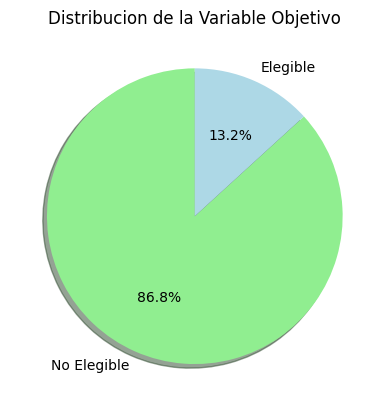

In [8]:
# Conteo de la variable objetivo
target_counts = dataset['Target'].value_counts()

labels = ['No Elegible', 'Elegible']
colors = ['lightgreen', 'lightblue']

plt.pie(target_counts, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
plt.title('Distribucion de la Variable Objetivo')
plt.show()


Se evidencia que tenemos un dataset desbalanceado

<Axes: xlabel='Target', ylabel='Total_income'>

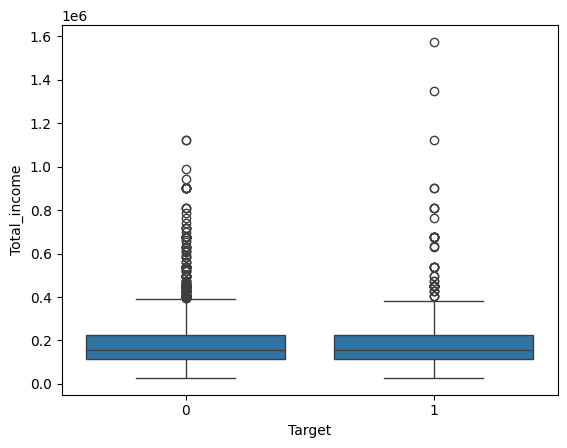

In [9]:
# Veamos la distribucion de los ingresos comparado con la variable objetivo
sns.boxplot(data=dataset, y= 'Total_income', x="Target")


In [10]:
income_pivot = dataset.pivot_table(values='Total_income', index='Target', aggfunc='mean')
print(income_pivot)

         Total_income
Target               
0       180500.539817
1       186007.008963


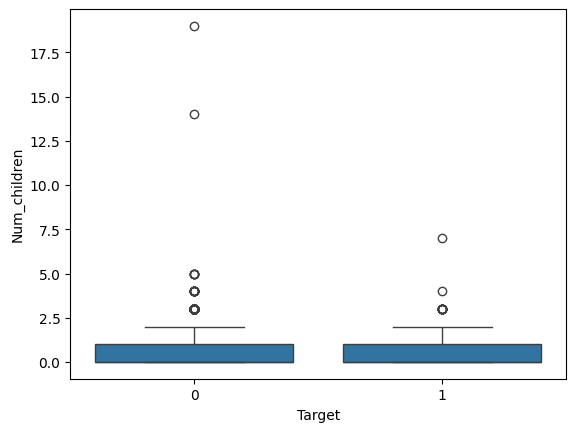

In [11]:
# Verifiquemos si la cantidad de hijos afecta la elegibilidad de la tarjeta de crédito

sns.boxplot(data=dataset, y= 'Num_children', x="Target")
plt.show()

Aparte de algunos valores atipicos no aparenta ver relación negativa entre la cantidad de hijos y la aprobación de la tarjeta de crédito

# Analisis bivariado de los datos

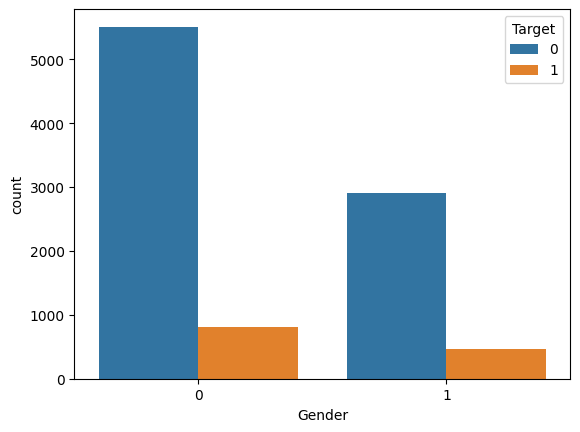

In [12]:
# Verifiquemos si el sexo afecta la variable objetivo
sns.countplot(x = 'Gender', hue = 'Target', data = dataset)
plt.show()


La diferencia entre las personas que reciben una tarjeta y las que no, a nivel de ingresos totales no aparenta ser tan significativa

<Axes: xlabel='Target', ylabel='Age'>

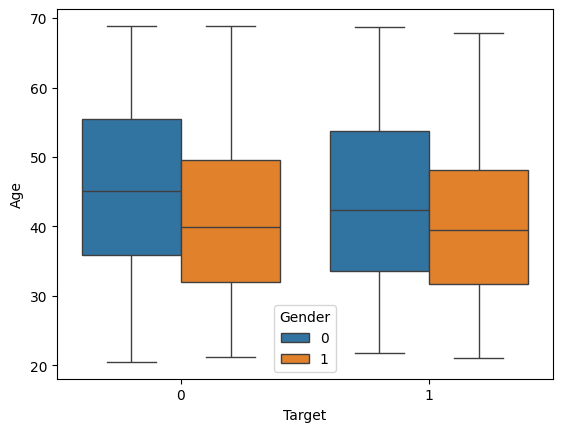

In [13]:
sns.boxplot(x = "Target", y = "Age", hue='Gender', data = dataset)

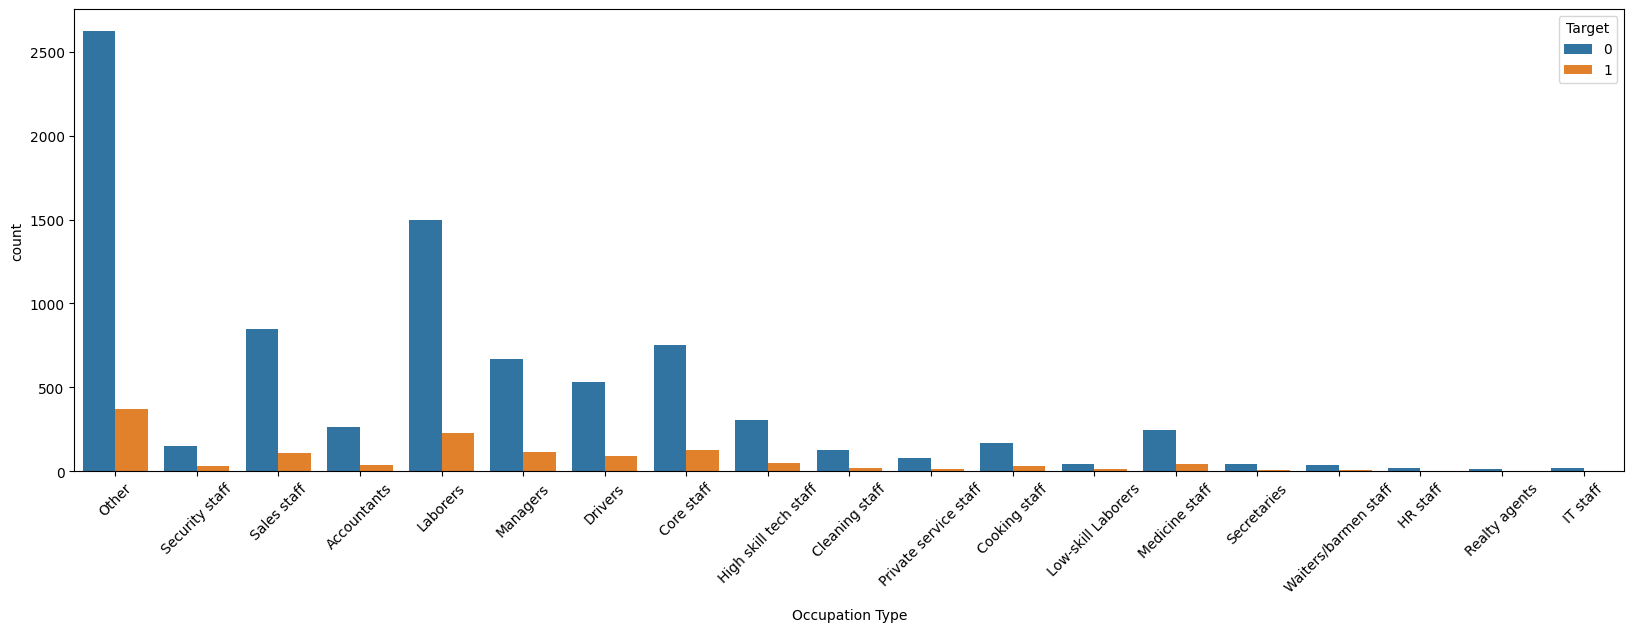

In [14]:
# Analizar si el tipo de ocupación afecta la variable objetivo
plt.figure(figsize=(20, 6))

sns.countplot(x = "Occupation_type", hue = "Target", data = dataset)
plt.xlabel("Occupation Type", labelpad=10.0)
plt.xticks(rotation=45)
plt.show()

La ocupación "Laborers" aparenta tener alta incidencia en la no aprobación del crédito

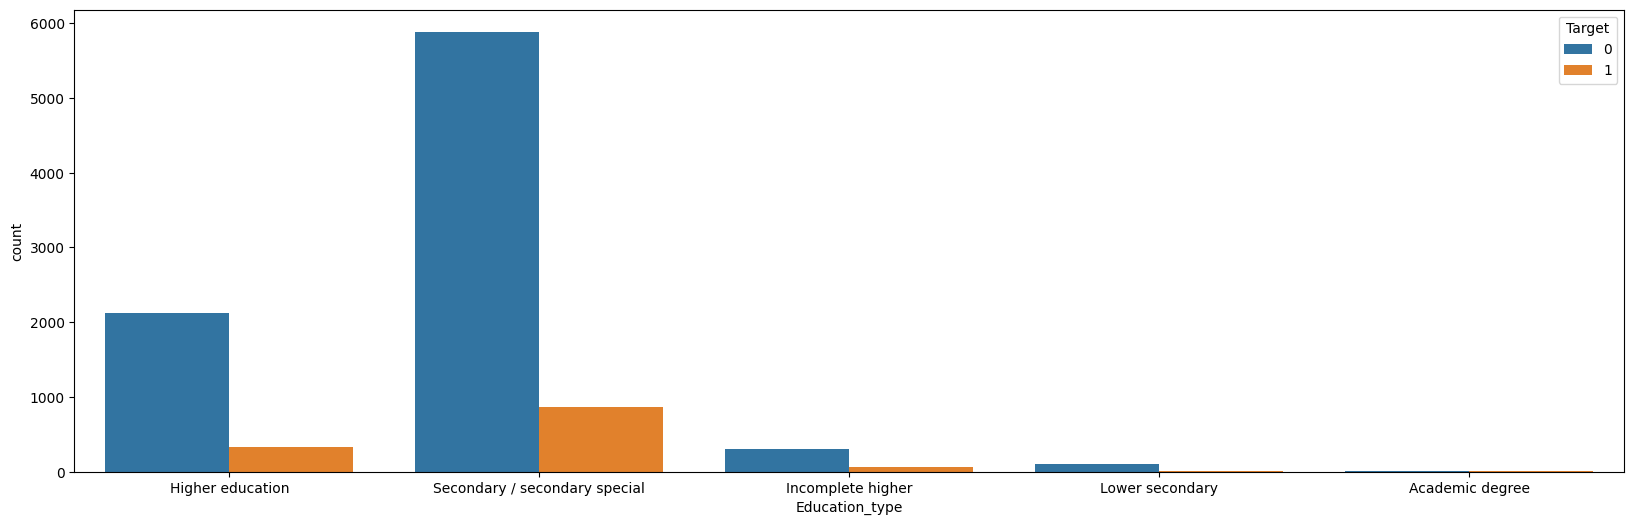

In [15]:
# Verifiquemos si el sexo afecta la variable objetivo
plt.figure(figsize=(20, 6))

sns.countplot(x = 'Education_type', hue = 'Target', data = dataset)
plt.show()

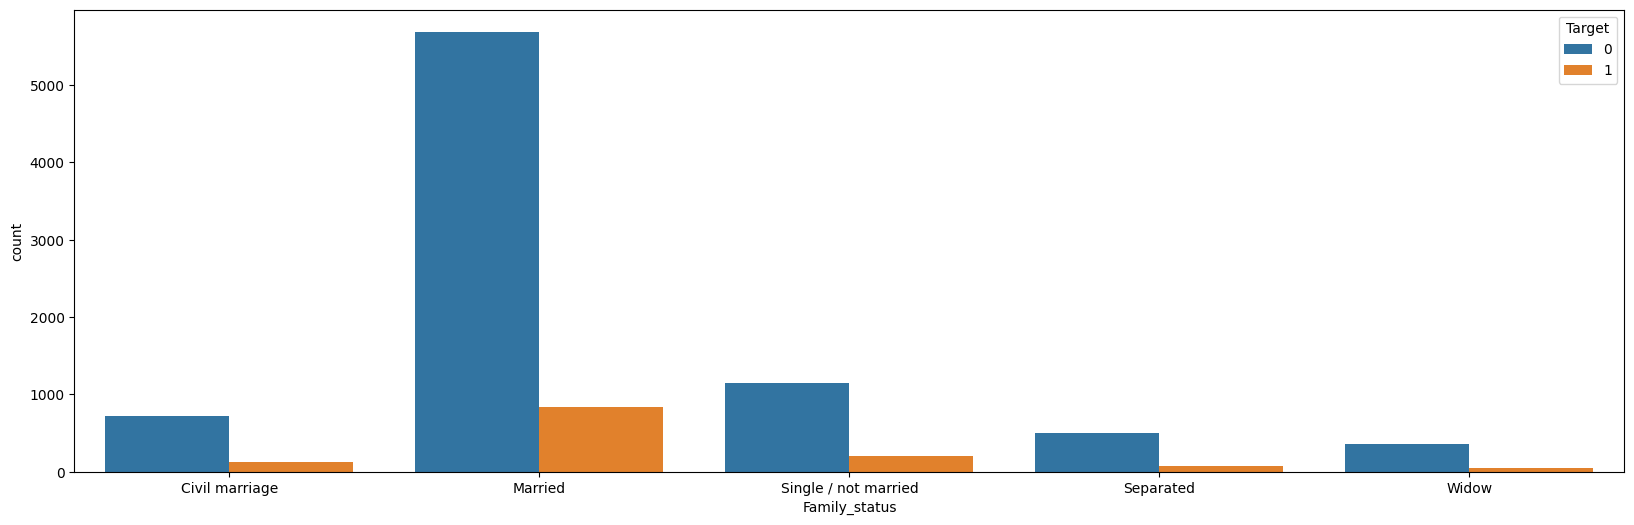

In [16]:
# Verifiquemos si el sexo afecta la variable objetivo
plt.figure(figsize=(20, 6))

sns.countplot(x = 'Family_status', hue = 'Target', data = dataset)
plt.show()

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [18]:
dataset.select_dtypes(include=['object'])

,Income_type,Education_type,Family_status,Housing_type,Occupation_type
0,Working,Higher education,Civil marriage,Rented apartment,Other
1,Working,Secondary / secondary special,Married,House / apartment,Security staff
2,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff
3,Pensioner,Higher education,Separated,House / apartment,Other
4,Working,Higher education,Married,House / apartment,Accountants
...,...,...,...,...,...
9704,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers
9705,Commercial associate,Secondary / secondary special,Married,House / apartment,Other
9706,Working,Secondary / secondary special,Married,House / apartment,Other
9707,Pensioner,Higher education,Married,House / apartment,Medicine staff


Text(70.7222222222222, 0.5, 'Housing_type')

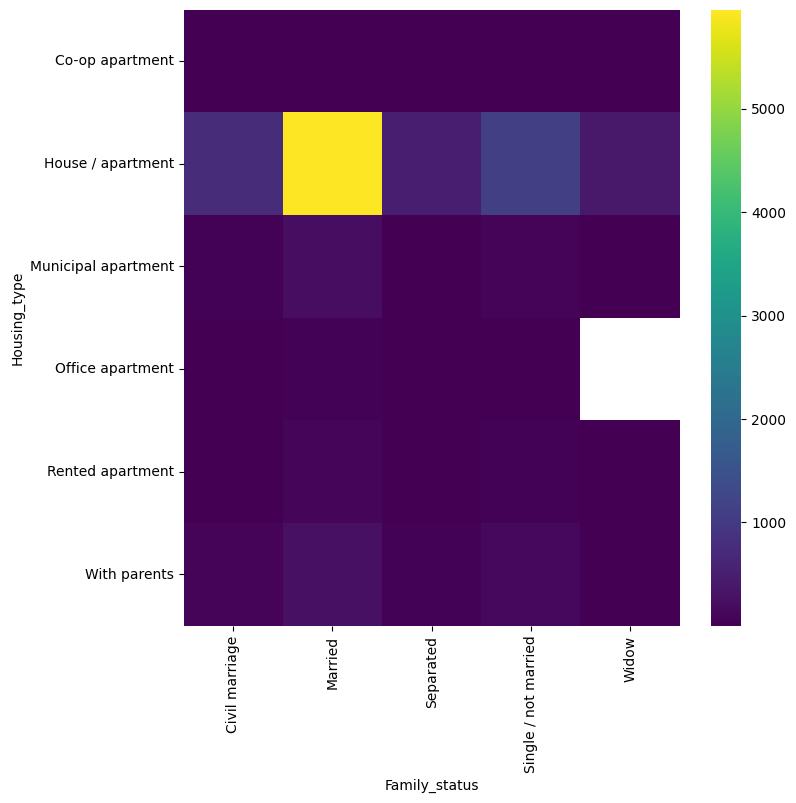

In [19]:
# Analisis bivariado de Family_status y Housing_type

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Housing_type'].value_counts()
    for x_label, grp in dataset.groupby('Family_status')
})

sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Family_status')
plt.ylabel('Housing_type')

Text(70.7222222222222, 0.5, 'Family_status')

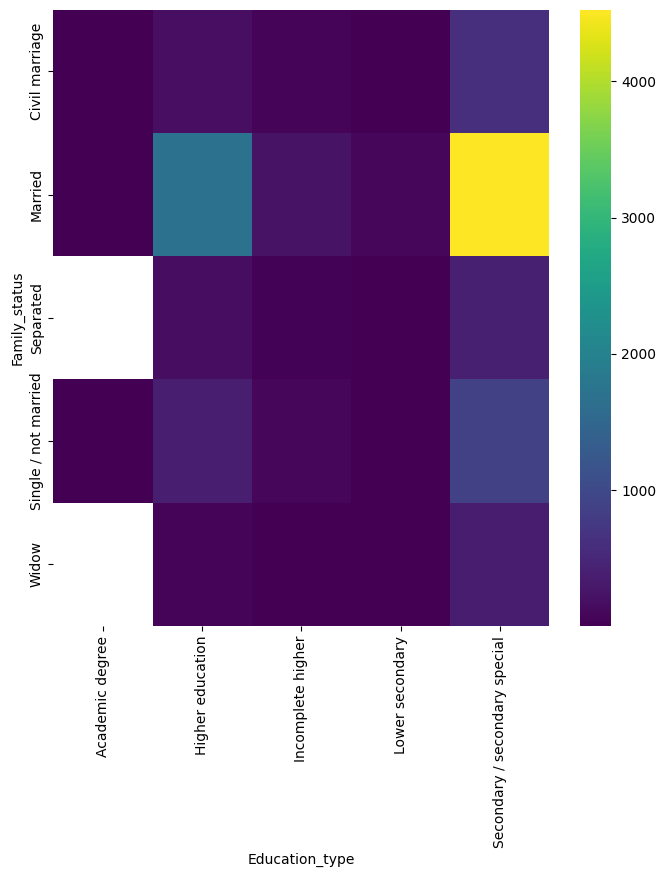

In [20]:
# Analisis bivariado de Family_status y Education_type

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Family_status'].value_counts()
    for x_label, grp in dataset.groupby('Education_type')
})

sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Education_type')
plt.ylabel('Family_status')

Se evidencia que la mayoria de aplicantes estan casados y con una educacion secundaria

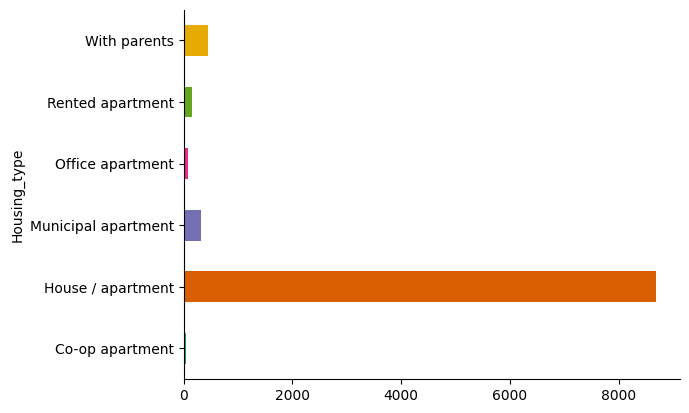

In [21]:
dataset.groupby('Housing_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

la mayoria de los aplicantes estan poseen House / apartment, podemos convertir esta variable en una dummies

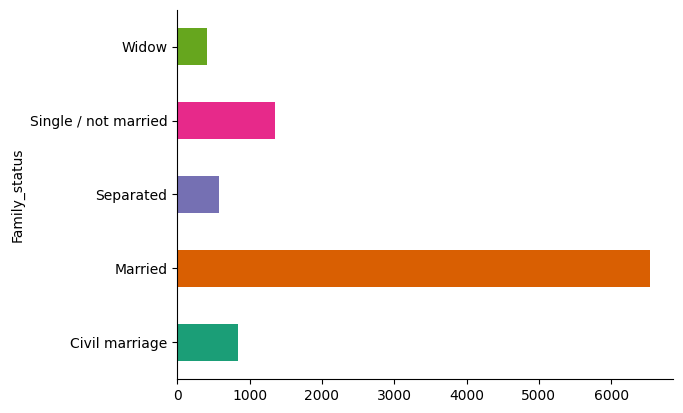

In [22]:
dataset.groupby('Family_status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

la mayoria de los aplicantes estan casados, podemos convertir esta variable en una dummies

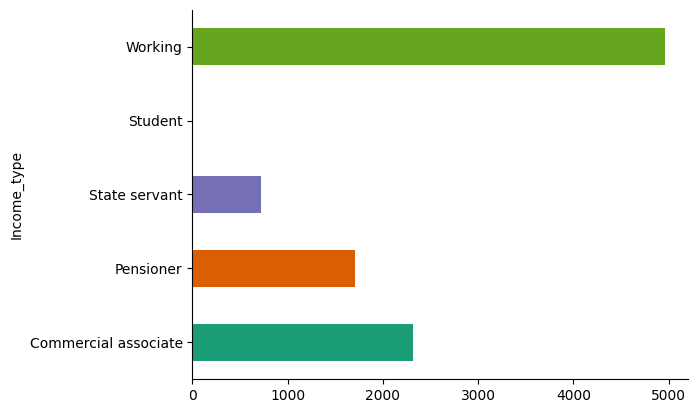

In [23]:
dataset.groupby('Income_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

plt.gca().spines[['top', 'right',]].set_visible(False)

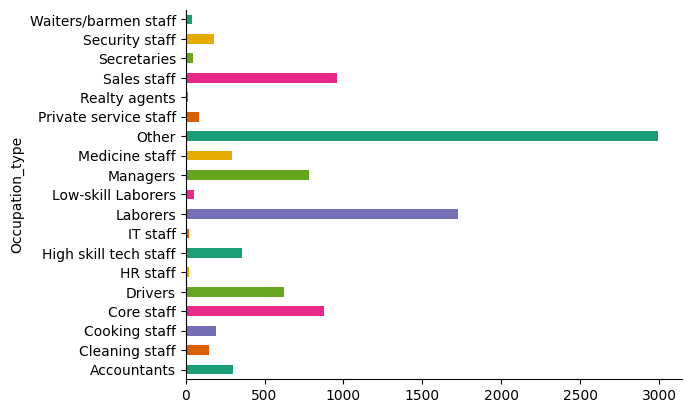

In [24]:
dataset.groupby('Occupation_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

plt.gca().spines[['top', 'right',]].set_visible(False)

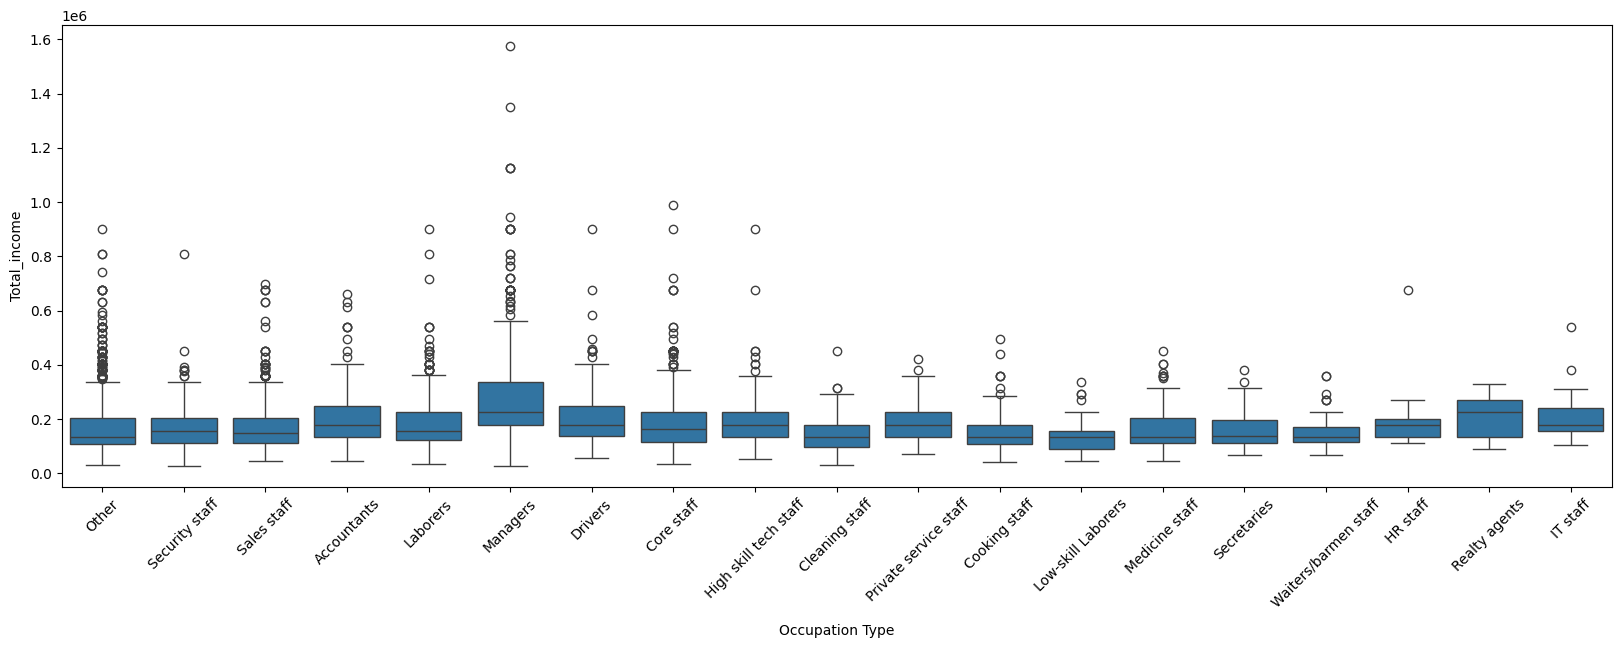

In [25]:
# Verifiquemos los ingresos basados en el tipo de ocupacion
plt.figure(figsize=(20, 6))
sns.boxplot(data=dataset, x= 'Occupation_type', y="Total_income")
plt.xlabel("Occupation Type", labelpad=10.0)
plt.xticks(rotation=45)
plt.show()

# Remover valores atipicos

Creamos una función para remover los valores atipicos

In [26]:
# Esta función calcula los percentiles 75 y 25 para utilizarlos como base en la obtención de los limites inferiores y superiores de cada variable

def remover_outliers(df, columnas):
    for columna in columnas:
      IQR = df[columna].quantile(0.75) - df[columna].quantile(0.25)
      lower_bound = df[columna].quantile(0.25) - 1.5 * IQR
      upper_bound = df[columna].quantile(0.75) + 1.5 * IQR
      df = df[((df[columna] >= lower_bound) & (df[columna] <= upper_bound))]

    return df

In [27]:
# Aplicamos la función creada para remover los outliers o valores atipicos del dataset

columnas_numericas = ['Age', 'Num_children', 'Num_family', 'Total_income', 'Account_length', 'Years_employed']

dataset_ = remover_outliers(dataset, columnas_numericas)


In [28]:
dataset_.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,8.792000e+03,8792.000000,8792.000000,8792.000000,8792.000000,8792.000000,8792.000000,8792.00000,8792.000000,8792.000000,8792.000000,8792.000000,8792.000000,8792.000000,8792.000000
mean,5.076238e+06,0.349864,0.361351,0.669927,0.213148,0.282188,0.086556,0.18949,0.380346,2.136374,27.122611,169528.038842,43.532682,4.607022,0.132507
std,4.086447e+04,0.476954,0.480419,0.470266,0.409555,0.450090,0.281199,0.39192,0.646836,0.835557,16.635171,72332.236385,11.848597,4.530469,0.339060
min,5.008806e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,27000.000000,20.504186,0.000000,0.000000
25%,5.036987e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,13.000000,112500.000000,33.555104,0.741288,0.000000
50%,5.069478e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,26.000000,157500.000000,42.228109,3.367626,0.000000
75%,5.113015e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,3.000000,41.000000,216000.000000,53.641074,7.179477,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.000000,4.000000,60.000000,391500.000000,68.863837,19.025716,1.000000


In [29]:
dataset_.head(5)

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
5,5008819,1,1,1,0,0,0,0,0,2,17,135000.0,48.674511,3.269061,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,0


Correlación de las variables

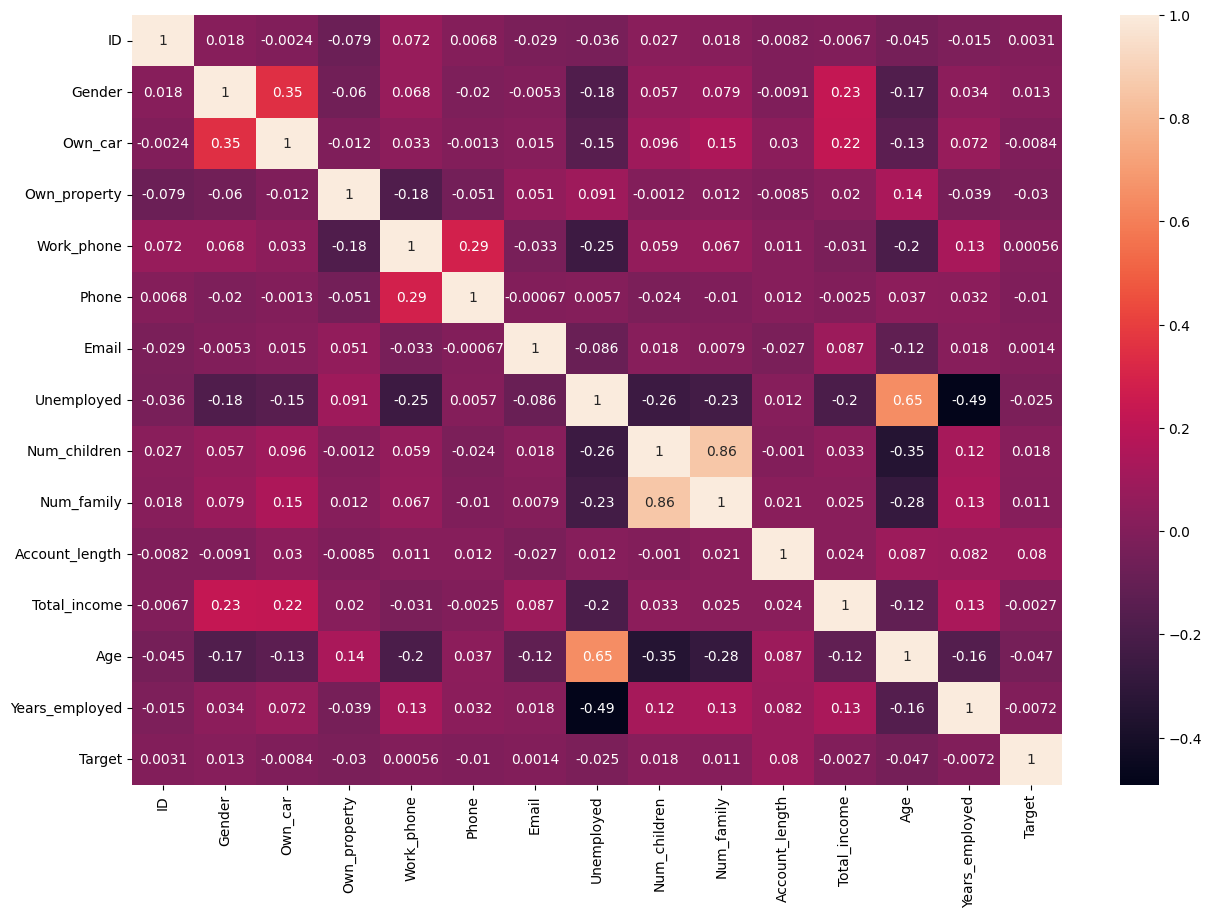

In [30]:
# Para poder predecir debemos evaluar la correlación, entre variables predictoras y entre variables predictoras con la variable objetivo
plt.figure(figsize = (15, 10))

correlation_matrix = dataset_.select_dtypes(include=['int64', 'float64']).corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()


Resultados del analisis de correlación


*  Las variables Num_family and Num_children poseen alta correlacion positiva, podemos eliminar la variable Num_family ya que posee una correlacion mas baja con la variable objetivo
*   Las variables Gender y Own_car poseen una correlación alta con respecto a las demas variables, tomando en cuenta que la variable Own_car posee una correlación negativa con la variable objetivo podemos disponer de ella
*   Las variables Unemployed y Years_employed poseen alta correlacion negativa, tomando en cuenta que la variable Unemployed tambien posee alta correlacion positiva con Age, podemos eliminar la variable Unemployed



In [31]:
dataset_.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone',
       'Email', 'Unemployed', 'Num_children', 'Num_family', 'Account_length',
       'Total_income', 'Age', 'Years_employed', 'Income_type',
       'Education_type', 'Family_status', 'Housing_type', 'Occupation_type',
       'Target'],
      dtype='object')

In [32]:
# Eliminamos columnas no necesarias
dataset_.drop(['ID', 'Work_phone', 'Phone', 'Email', 'Unemployed', 'Num_family', 'Own_car'], axis=1, inplace=True)
dataset_.head()

,Gender,Own_property,Num_children,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
1,1,1,0,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,0,1,0,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,0,1,0,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,1,1,0,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
5,1,1,0,17,135000.0,48.674511,3.269061,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,0


# Tranformacion de Variables Categoricas

In [33]:
# Crearemos una variable dummy basandonos en Income_type tomando en cuenta que el 50% de los valores corresponden a Working
dataset_['working'] = np.where(dataset_['Income_type'] == 'Working', 1, 0)
dataset_['house_apartment'] = np.where(dataset_['Housing_type'] == 'House / apartment', 1, 0)
dataset_['married'] = np.where(dataset_['Family_status'] == 'Married', 1, 0)

In [34]:
# Crearemos dummies para las demas variables categoricas
categorical_features = ['Education_type', 'Occupation_type']

dataset_dm = pd.get_dummies(dataset_, columns=categorical_features, dtype='float', drop_first=True) # hacemos drop del primer valor para evitar redundar y confundir el modelo

dataset_dm.drop(columns={'Income_type', 'Family_status', 'Housing_type'}, axis=1, inplace=True)

In [35]:
dataset_dm.head()

,Gender,Own_property,Num_children,Account_length,Total_income,Age,Years_employed,Target,working,house_apartment,...,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff
1,1,1,0,29,112500.0,58.793815,3.104787,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,1,0,4,270000.0,52.321403,8.353354,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,1,0,20,283500.0,61.504343,0.000000,0,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,5,270000.0,46.193967,2.105450,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,1,0,17,135000.0,48.674511,3.269061,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
dataset_dm.columns = dataset_dm.columns.str.replace('/ ', '').str.replace(' ', '_').str.replace('/', '').str.lower()

In [37]:
dataset_dm.columns

Index(['gender', 'own_property', 'num_children', 'account_length',
       'total_income', 'age', 'years_employed', 'target', 'working',
       'house_apartment', 'married', 'education_type_higher_education',
       'education_type_incomplete_higher', 'education_type_lower_secondary',
       'education_type_secondary_secondary_special',
       'occupation_type_cleaning_staff', 'occupation_type_cooking_staff',
       'occupation_type_core_staff', 'occupation_type_drivers',
       'occupation_type_hr_staff', 'occupation_type_high_skill_tech_staff',
       'occupation_type_it_staff', 'occupation_type_laborers',
       'occupation_type_low-skill_laborers', 'occupation_type_managers',
       'occupation_type_medicine_staff', 'occupation_type_other',
       'occupation_type_private_service_staff',
       'occupation_type_realty_agents', 'occupation_type_sales_staff',
       'occupation_type_secretaries', 'occupation_type_security_staff',
       'occupation_type_waitersbarmen_staff'],
      dt

In [38]:
# Ordenamos un poco las variables
dataset_dm = dataset_dm[['gender', 'own_property', 'num_children', 'account_length',
                        'total_income', 'age', 'years_employed', 'working',
                        'house_apartment', 'married', 'education_type_higher_education',
                        'education_type_incomplete_higher', 'education_type_lower_secondary',
                        'education_type_secondary_secondary_special',
                        'occupation_type_cleaning_staff', 'occupation_type_cooking_staff',
                        'occupation_type_core_staff', 'occupation_type_drivers',
                        'occupation_type_hr_staff', 'occupation_type_high_skill_tech_staff',
                        'occupation_type_it_staff', 'occupation_type_laborers',
                        'occupation_type_low-skill_laborers', 'occupation_type_managers',
                        'occupation_type_medicine_staff', 'occupation_type_other',
                        'occupation_type_private_service_staff',
                        'occupation_type_realty_agents', 'occupation_type_sales_staff',
                        'occupation_type_secretaries', 'occupation_type_security_staff',
                        'occupation_type_waitersbarmen_staff', 'target']]

#Feature Selection

Para el feature selection utilizaremos el metodo Forward Selection

In [39]:
import statsmodels.api as sm

def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [40]:
forward_selection(dataset_dm, dataset_dm['target'])

['target',
 'own_property',
 'occupation_type_other',
 'occupation_type_laborers',
 'education_type_secondary_secondary_special',
 'education_type_higher_education',
 'occupation_type_sales_staff',
 'years_employed',
 'gender',
 'total_income']

In [41]:
# Nos quedamos con el resultado del forward Selection
dataset_dm_ = dataset_dm[['target',
                      'own_property',
                      'num_children',
                      'occupation_type_sales_staff',
                      'occupation_type_drivers',
                      'education_type_higher_education',
                      'years_employed',
                      'house_apartment',
                      'age',
                      'account_length',
                      'total_income']]

**Respuestas a preguntas:**

1.   La edad, el tamaño de la familia, el genero, el tipo de trabajo y los ingresos totales de los aplicantes no aparentan ser factores determinantes fuertes para la aprobación de las tarjetas de credito



# Metricas algoritmos de clasificacion

In [42]:
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.model_selection import train_test_split
 from sklearn import metrics
 from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
 from imblearn.over_sampling import SMOTE

In [43]:
dataset_dm_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8792 entries, 1 to 9708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   target                           8792 non-null   int64  
 1   own_property                     8792 non-null   int64  
 2   num_children                     8792 non-null   int64  
 3   occupation_type_sales_staff      8792 non-null   float64
 4   occupation_type_drivers          8792 non-null   float64
 5   education_type_higher_education  8792 non-null   float64
 6   years_employed                   8792 non-null   float64
 7   house_apartment                  8792 non-null   int64  
 8   age                              8792 non-null   float64
 9   account_length                   8792 non-null   int64  
 10  total_income                     8792 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 824.2 KB


### Balanceo de los datos

Antes de entrenar el modelo es necesario hacer un balanceo de la variable target

In [44]:
dataset_dm_['target'].value_counts()

target
0    7627
1    1165
Name: count, dtype: int64

Haremos un oversampling utilizando SMOTE que consiste en crear nuevas muestras o registros sinteticos basandose en los vecinos mas cercanos, para aumentar la muestra minoritaria de nuestra variable objetivo

In [45]:
X = dataset_dm_.drop('target', axis=1)
y = dataset_dm_['target']

In [46]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X, y)

print('Balanced class counts:', y_train_sm.value_counts())

Balanced class counts: target
0    7627
1    7627
Name: count, dtype: int64


In [47]:
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X_train_sm, y_train_sm, test_size=0.2, random_state=1)

In [48]:
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)

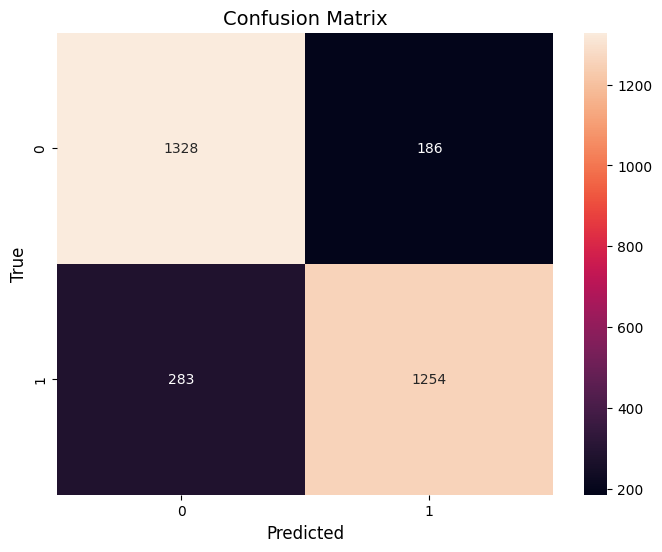

In [49]:
# Se genera la matriz de confusion
cm = confusion_matrix(y_test, preds)

# Se crea el grafico
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt="d", ax=ax)
ax.set_xlabel("Predicted", fontsize=12)
ax.set_ylabel("True", fontsize=12)
ax.set_title("Confusion Matrix", fontsize=14)

plt.show()

In [50]:
# Classification Report
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1514
           1       0.87      0.82      0.84      1537

    accuracy                           0.85      3051
   macro avg       0.85      0.85      0.85      3051
weighted avg       0.85      0.85      0.85      3051



# Evaluación de Resultados de Predicciones

En general nuestro modelo cuenta con un F1-score de 85% que resulta ser bueno. Podemos concluir que nuestro modelo es bueno para predecir las aplicaciones en las aprobaciones de tarjetas de credito, aunque posee oportunidades en la deteccion real del valor 1 con un recall de 82%.